In [3]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [168]:
def load_images(source_dir):
    imgs = []
    
    for (dirpath, dirnames, filenames) in os.walk(source_dir):
        imgs.extend([filename for filename in filenames if filename.endswith('.jpg') or filename.endswith('.png')])
        break
    
    image_list = [cv2.imread(os.path.join(source_dir, img), 1) for img in imgs]

    return image_list

In [175]:
img_list = load_images('../input_image/harris')

In [170]:
img = img_list[0]
dst = cv2.cornerHarris(img[:,:,0],2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [192]:
def harris_corner(img, threshold=0, k=0.04, kernel=3):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height, width, _ = img.shape
    dx = cv2.Sobel(gray, -1, 1, 0)
    dy = cv2.Sobel(gray, -1, 0, 1)

    #dy, dx = np.gradient(gray)
    Ixx = dx**2
    Iyy = dy**2
    Ixy = dx*dy
    
    corners = np.zeros(shape=(height*width//1000, 3), dtype=np.float32)
    offset = kernel//2
    for y in range(offset, height-offset+1):
        for x in range(offset, width-offset+1):
            # if window function is binary
            Sxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1].sum()
            Syy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1].sum()
            Sxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1].sum()
            
            # M = [[Sxx, Sxy],
            #      [Sxy, Syy]]
            det_M = Sxx*Syy - Sxy**2
            trace_M = Sxx + Syy
            
            R = det_M - k*(trace_M**2)
            
            if R > corners.min():
                corners[np.argmin(corners, axis=0)[-1]] = [x, y, R]
                #corners.append([x, y, R])
            
    #print(corners)
    return corners
    

In [193]:
cm = harris_corner(img_list[0], 10000)
#c[dst>0.01*dst.max()]=[0,0,255]
 

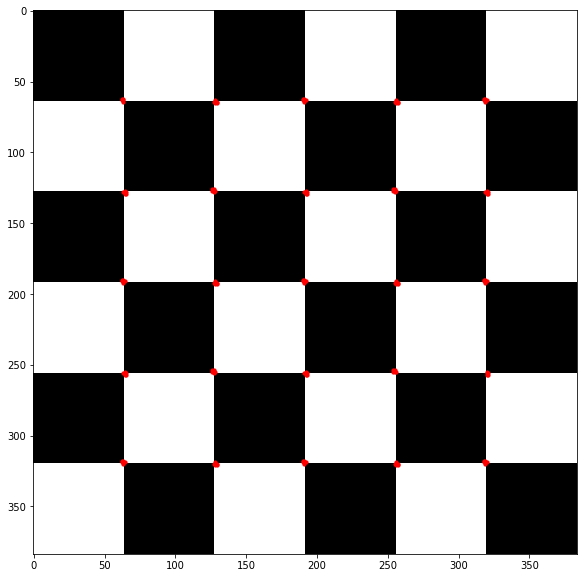

In [194]:
plt.figure(figsize=(10,10))
plt.imshow(img_list[0])
for x in cm:
    plt.scatter(x=x[0], y=x[1], c='r', s=10)

plt.show()